<a href="https://colab.research.google.com/github/Priyanka142806/Car_Price_web_app/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Deployment using Streamlit

<center><img src="https://assets.website-files.com/5dc3b47ddc6c0c2a1af74ad0/5e18182db827fa0659541754_RGB_Logo_Vertical_Color_Light_Bg.png" width="300" height="80" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
   
   - **4.1** [**Data Description**](#Section41)
   - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Preparation**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **Streamlit** is a tool for Data Scientists and **Machine Learning Engineers** to create the front end of the web application.


- It quickly turns **data scripts** into shareable web applications. You just have to pass a running script to the tool and it can convert that to a **web app**.


- **Everything in Python**: The best thing about Streamlit is that everything we do is in Python. Starting from loading the model to creating the frontend, all can be done using Python.


- **All for free**: It is open source and hence no cost is involved. You can deploy your apps without paying for them.


- **No front-end experience required**: Model deployment generally contains two parts, frontend, and backend. The backend is generally a working model, a machine learning model in our case, which is built-in python. And the front end part, which generally requires some knowledge of other languages like java scripts, etc. Using Streamlit, we can create this front end in Python itself. So, we need not learn any other programming languages or web development techniques. Understanding Python is enough.

---

<a name = Section2></a>
# **2. Problem Statement**
---

- In many developed countries, it is common to buy a **used/second-hand car** rather than buying it outright. 


- **Predicting** the resale value of a car is not a simple task. It is trite knowledge that the value of used cars depends on a number of factors. 


- You have to **predict** the **selling** price of a car using Machine Learning algorithms

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

In [86]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset is provided by a **used  car selling** company and it is accessible <a href="https://raw.githubusercontent.com/insaid2018/Term-2/master/car%20data.csv">**here**</a>.

In [88]:
df = pd.read_csv(r'car data.csv')
print('Data Shape:', df.shape)
df.head()

Data Shape: (301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [90]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [92]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [93]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [94]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [95]:
final_dataset['Current Year']=2020

In [97]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [98]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [99]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [100]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [101]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [102]:
le = LabelEncoder()
final = final_dataset[['Fuel_Type', 'Seller_Type','Transmission']].apply(le.fit_transform)

In [103]:
final_dataset.drop(['Fuel_Type', 'Seller_Type', 'Transmission'], inplace=True,axis=1)

In [104]:
Fuel = final['Fuel_Type']
Seller = final['Seller_Type']
Transmission = final['Transmission']

In [105]:
final_dataset=final_dataset.join(Fuel)
final_dataset=final_dataset.join(Seller)
final_dataset=final_dataset.join(Transmission)

In [106]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type,Seller_Type,Transmission
0,3.35,5.59,27000,0,2020,6,2,0,1
1,4.75,9.54,43000,0,2020,7,1,0,1
2,7.25,9.85,6900,0,2020,3,2,0,1
3,2.85,4.15,5200,0,2020,9,2,0,1
4,4.60,6.87,42450,0,2020,6,1,0,1


In [107]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [108]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type,Seller_Type,Transmission
0,3.35,5.59,27000,0,6,2,0,1
1,4.75,9.54,43000,0,7,1,0,1
2,7.25,9.85,6900,0,3,2,0,1
3,2.85,4.15,5200,0,9,2,0,1
4,4.60,6.87,42450,0,6,1,0,1


<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [109]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type,Seller_Type,Transmission
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.509467,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.440415,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,-0.166801,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,0.055705,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,0.053643,0.039896,-0.000394
Fuel_Type,-0.509467,-0.440415,-0.166801,0.055705,0.053643,1.000000,0.352415,0.080466
Seller_Type,-0.550724,-0.512030,-0.101419,0.124269,0.039896,0.352415,1.000000,0.063240
Transmission,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,0.080466,0.063240,1.000000


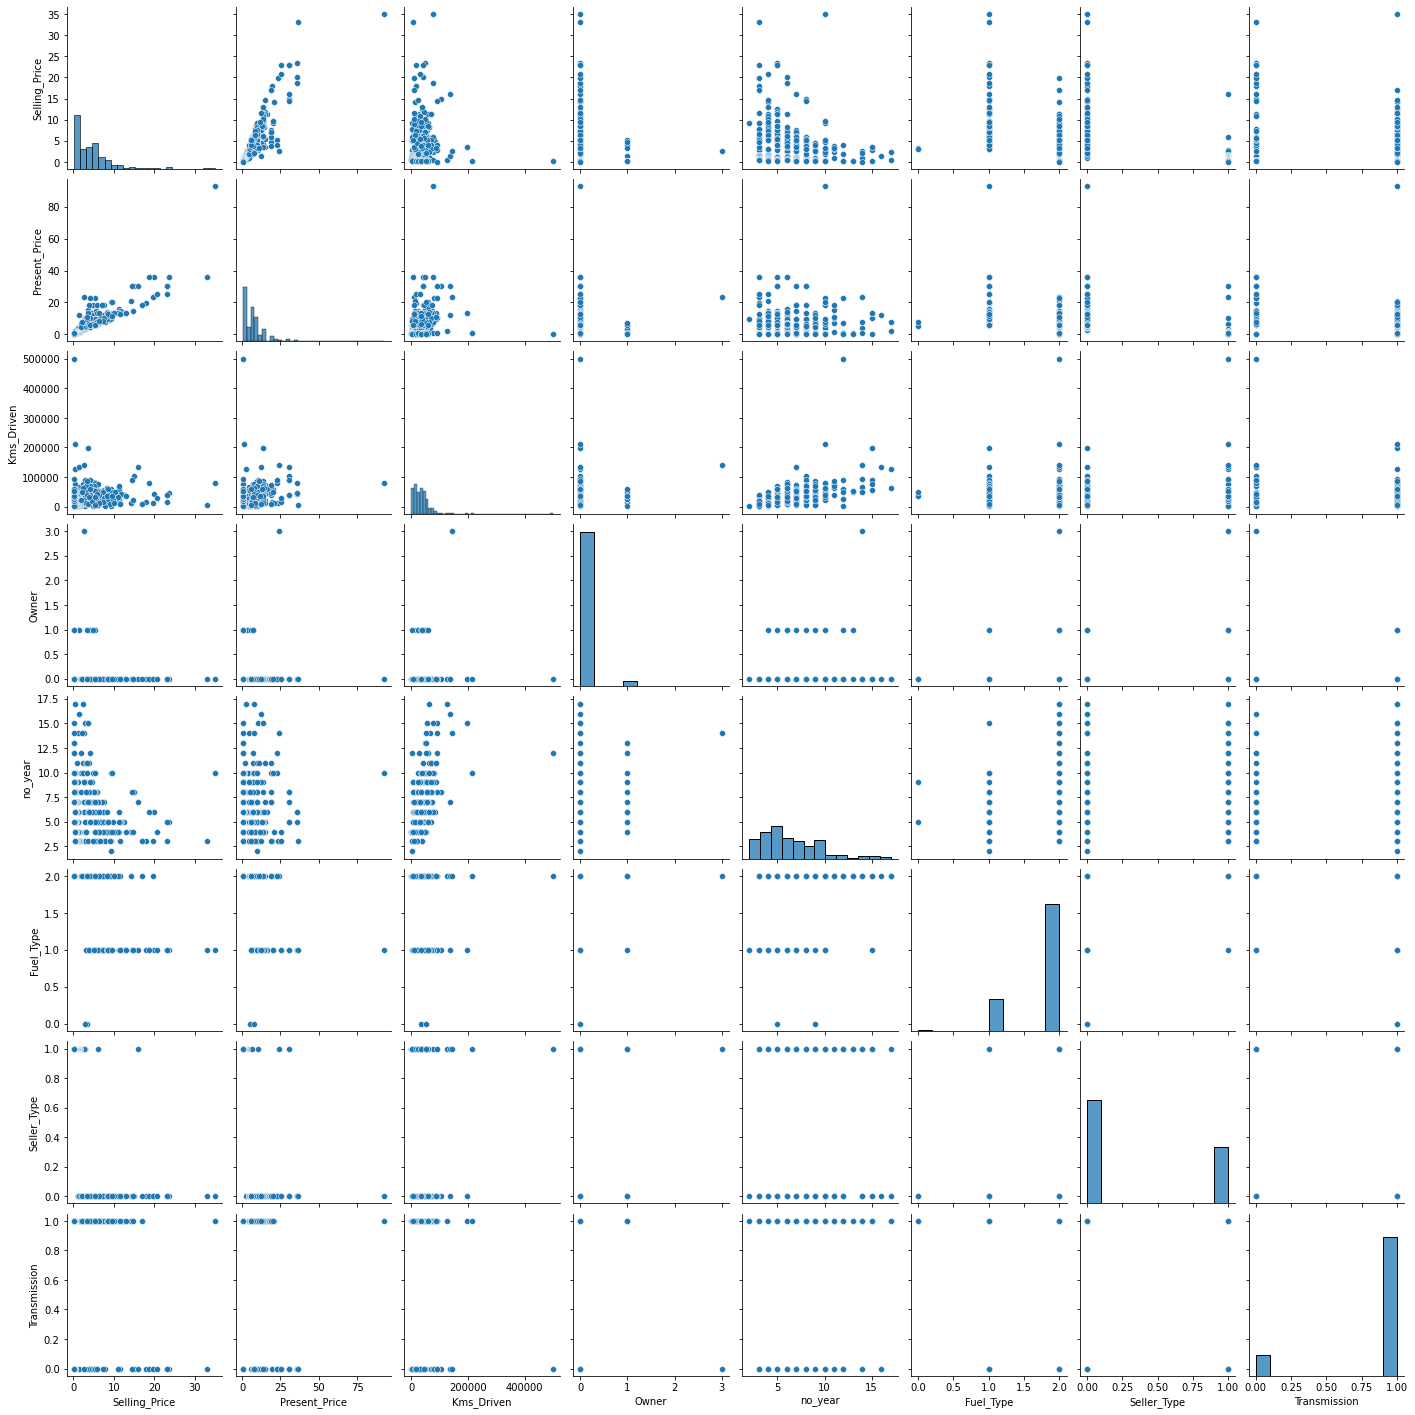

In [110]:
sns.pairplot(final_dataset)

<a name = Section74></a>
## **7.  Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [111]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [112]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'no_year', 'Fuel_Type',
       'Seller_Type', 'Transmission'],
      dtype='object')

In [113]:
X['Owner'].unique()

array([0, 1, 3])

In [114]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type,Seller_Type,Transmission
0,5.59,27000,0,6,2,0,1
1,9.54,43000,0,7,1,0,1
2,9.85,6900,0,3,2,0,1
3,4.15,5200,0,9,2,0,1
4,6.87,42450,0,6,1,0,1


In [115]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [117]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [118]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [119]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [120]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [121]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   46.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [122]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [123]:
rf_random.best_score_

-4.109184744380205

In [124]:
predictions=rf_random.predict(X_test)

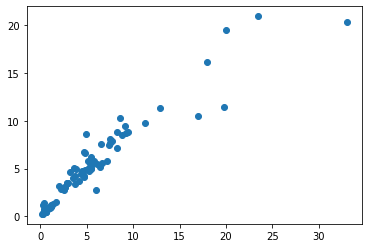

In [125]:
plt.scatter(y_test,predictions)

In [126]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8627393406593351
MSE: 3.765877321624173
RMSE: 1.9405868498019287


In [127]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)